# 1. Perkenalan

Nama                 : Hafidz Abdillah Masruri<br>
Batch   : HCK-18<br>
Dataset : [Dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing)<br>
Notebook ini bertujuan untuk memubat model Classification untuk memprediksi nasabah yang gagal membayar bulan depan<br>
Deployment : [URL Deploy](https://huggingface.co/spaces/hfdzam/Prediction_M2)

=====================================================================================<br>

## **Latar Belakang**<br>
Dalam industri perbankan, pemasaran produk deposito berjangka merupakan strategi yang penting untuk meningkatkan pendapatan dan retensi pelanggan. Namun beberapa tahun belakangan ini, mengidentifikasi pelanggan yang benar-benar berpotensi untuk mendaftar (target 'y') dapat menjadi tantangan. Salah satu risiko utama adalah kesalahan prediksi yang dapat mengakibatkan penolakan kepada calon pelanggan yang sebenarnya berminat, yang disebut sebagai false negative. False negative ini bisa mengurangi potensi pendapatan dan juga membuat pelanggan kecewa.

## SMART<br>
(S): Meningkatkan kemampuan model prediktif dalam mendeteksi pelanggan yang berpotensi melakukan default pada pinjaman bank.<br>
(M): Meningkatkan nilai recall(FN) untuk kelas positif sebesar 10%.<br>
(A): Deteksi lebih awal terhadap pelanggan yang berpotensi default akan membantu bank dalam mengelola risiko kredit dengan lebih baik dan mengurangi potensi kerugian.<br>
(R): Fokus pada recall untuk kelas positif karena mendeteksi kasus positif sangat penting dalam konteks penggunaannya.<br>
(T): Dapat dilakukan dalam kurun waktu 6 bulan.

## Problem Statment<br>
Industri perbankan menghadapi tantangan dalam memprediksi pelanggan yang berpotensi melakukan default pada pinjaman. Model prediktif saat ini sering kali gagal mendeteksi pelanggan yang sebenarnya berminat, menghasilkan false negatives yang mengakibatkan kerugian finansial dan penurunan kepuasan pelanggan. Untuk mengatasi masalah ini, diperlukan peningkatan nilai recall untuk kelas positif sebesar 10% dalam waktu 6 bulan, guna memperbaiki deteksi risiko dan memaksimalkan pendapatan.

## Problem Breakdown:<br>
- Berapa banyak klien yang berlangganan deposito berjangka?
- Bagaimana distribusi status perkawinan klien terhadap target?
- Pekerjaan apa yang paling umum di antara klien?
- Apa saja status education klien?

# 2. Import Library

In [49]:
# For basic use
import pandas as pd
import numpy as np

# For visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# For feature engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr, chi2_contingency

# For imbalance data
from imblearn.over_sampling import SMOTENC

# For pipeline creation
from sklearn.pipeline import make_pipeline

# Encode, Scale, Transform
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Accuracy score and metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Saving models
import pickle

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Import Library yang digunakan untuk pengerjaan

# 3. Data Loading

In [50]:
df = pd.read_csv('bank.csv', delimiter=';')
df1 = df.copy()
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


| **fullname**     | **type**        | **description**                                                                                      |
|------------------|-----------------|------------------------------------------------------------------------------------------------------|
| age              | INT64           | Age of the client.                                                                                |
| job              | OBJECT          | Pekerjaan berisi: unemployed, services, management, blue-collar, self-employed, technician, entrepreneur, admin., student, housemaid, retired, unknown. |
| marital          | OBJECT          | Marital status: divorced, married, single.                                                           |
| education        | OBJECT          | Education level:<br> primary (Pendidikan dasar)<br> secondary (Pendidikan menengah)<br> tertiary (Pendidikan tinggi, misalnya, diploma, sarjana, pascasarjana)<br> unknown (Status pendidikan tidak diketahui). |
| default          | OBJECT          | Client gagal membayar kredit: yes or no.                                                             |
| balance          | INT64           | Average yearly balance in euros.                                                                    |
| housing          | OBJECT          | Client memiliki cicilan rumah: yes or no.                                                            |
| loan             | OBJECT          | Client memiliki hutang: yes or no.                                                                   |
| contact          | OBJECT          | Nomor telepon client: cellular, unknown, telephone.                                                  |
| day              | INT64           | Terakhir dihubungi (hari) (numeric).                                                                 |
| month            | OBJECT          | Terakhir dihubungi (bulan).                                                                         |
| duration         | INT64           | Durasi lama waktu dihubungi (detik).                                                                 |
| campaign         | INT64           | Berapa kali client dihubungi untuk penawaran event tertentu.                                        |
| pdays            | INT64           | Terakhir dihubungi untuk penawaran event (numeric; -1 means client was not previously contacted).   |
| previous         | INT64           | Seberapa sering client dihubungi untuk penawaran event sebelumnya.                                 |
| poutcome         | OBJECT          | Bagaimana hasil dari pengaruh penawaran event: unknown, failure, other, success.                     |
| y                | OBJECT          | Apakah client telah mendaftar untuk produk deposito berjangka: yes or no.                           |


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Mendapatkan informasi bahwa terdapat 17 kolom dengan kolom y adalah target dan 4521 baris serta typedata tiap kolom 7 integer, 10 object. Data juga menunjukan bahwa terdapat numerikal dan kategorikal

# 4. Exploratory Data Analysis (EDA)

In [52]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat missing value

In [53]:
df1.duplicated().sum()

0

Tidak terdapat duplikasi data

## 4.1 Jumlah Rata rata Balance pada target

,y,balance
0,no,1403.211750
1,yes,1571.955854


Rata-rata keseluruhan: 1422.6578190665782


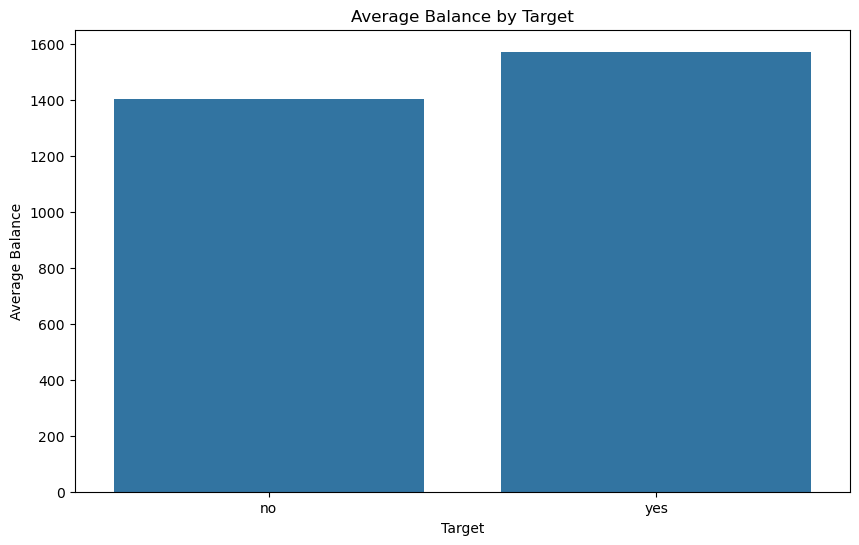

In [54]:
rata2b = df1.groupby('y')['balance'].mean().reset_index()
display(rata2b)
print("Rata-rata keseluruhan:",df1['balance'].mean())


# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='balance', data=rata2b)
plt.title('Average Balance by Target')
plt.xlabel('Target')
plt.ylabel('Average Balance')
plt.show()

Pada barChart terkait average Balance pada target terlihat bahwa balance pada target yes dan no tidak terlalu berbeda jauh no memiliki rata-rata pada nilai 1403.211750 sedangkan pada yes memiliki nilai rata-rata 1571.955854 dimana rata-rata keseluruhan pada dataset sebesar 1422.6578190665782

## 4.2 Jumlah persentase Target

,y,Total
0,no,4000
1,yes,521


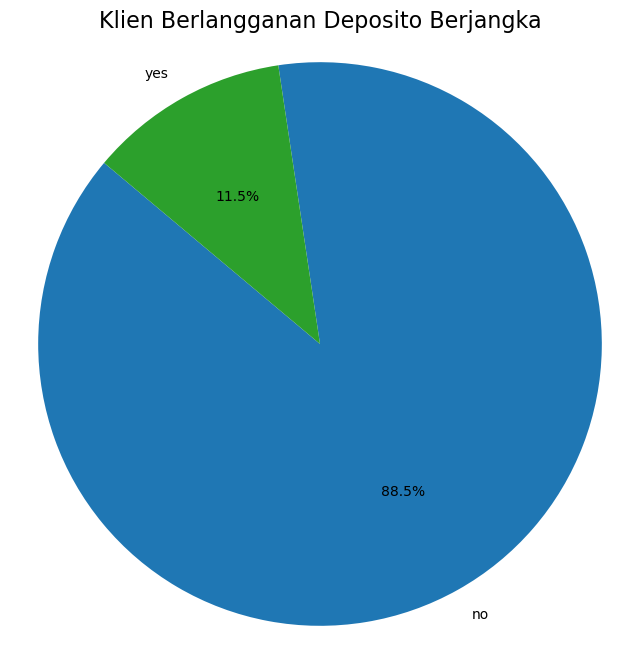

In [55]:
# Hitung frekuensi dan reset index
y = df1['y'].value_counts()
y = y.reset_index()
y.columns = ['y', 'Total']
display(y)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']  # Warna biru dan hijau, dengan tambahan warna untuk potongan lainnya
plt.pie(y['Total'], labels=y['y'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Klien Berlangganan Deposito Berjangka', fontsize=16, ha='center')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Tampilkan Pie Chart
plt.show()

| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |

Source : [LINK](https://colab.research.google.com/github/FTDS-learning-materials/phase-1/blob/master/w4/P1W4D2AM%20-%20Data%20Balancing.ipynb#scrollTo=evhazsjHqx8R)

Target hanya 2 yaitu yes dan no, total yes adalah 11,5% yaitu 521 dan no adalah 88,5% 4000 total data adalah 4521, kelas yes termasuk kelas minoritas dan data hanya 521 tidak ada 1% dari total data

Data ini menunjukkan ketidakseimbangan yang cukup besar antara kategori 'yes' dan 'no', dengan kategori 'no' jauh lebih dominan dibandingkan dengan kategori 'yes'.

## 4.3 Distribusi status marital client terhadap target

,y,marital,Total
0,no,divorced,451
1,no,married,2520
2,no,single,1029
3,yes,divorced,77
4,yes,married,277
5,yes,single,167


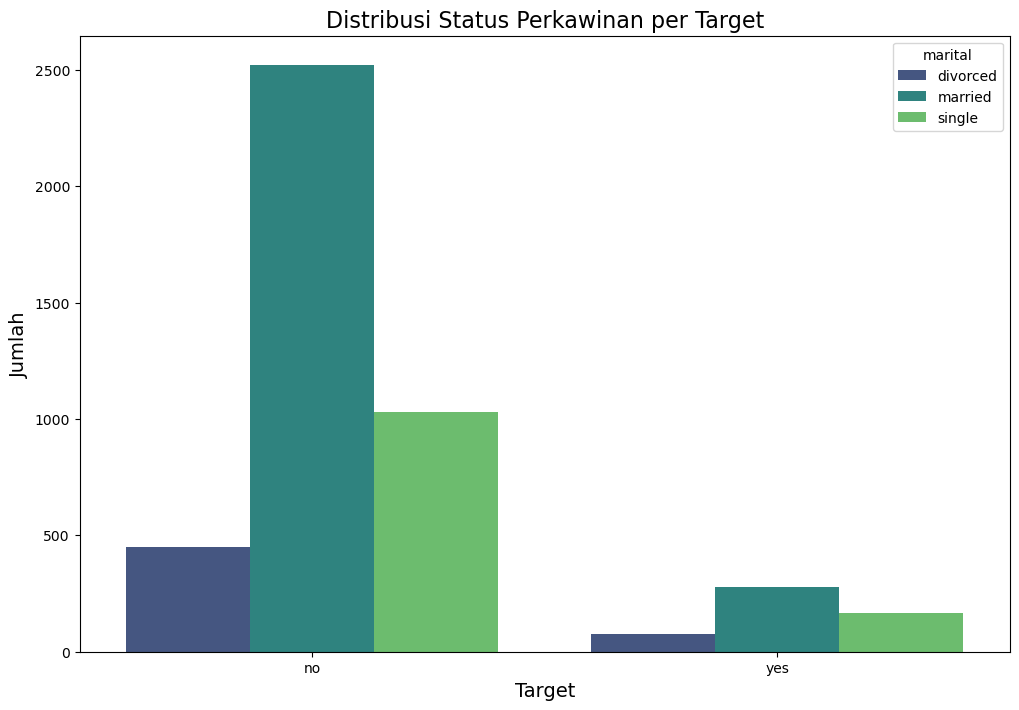

In [56]:
summary_df = df.groupby(['y', 'marital']).size().reset_index(name='Total')
display(summary_df)

# Plot Bar Chart
plt.figure(figsize=(12, 8))
sns.barplot(x='y', y='Total', hue='marital', data=summary_df, palette='viridis')

# Add title and labels
plt.title('Distribusi Status Perkawinan per Target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Tampilkan Bar Chart
plt.show()

Pada dapat dapat disimpulkan bahwa status perkawinan dari data terbanyak adalah berstatus married (2797) dimana tidak mendaftar untuk deposito 2520 dan sudah mendaftar 277, single (1196) dimana tidak mendaftar untuk deposito 1029 dan sudah mendaftar 167, lalu yang terakhir divorced (528) dimana tidak mendaftar 451 dan sudah mendaftar 77.

Dari hasil tersebut, terlihat bahwa status perkawinan "married" memiliki jumlah terbanyak baik yang tidak mendaftar maupun yang sudah mendaftar untuk deposito. Selanjutnya, status "single" juga menunjukkan angka yang signifikan, sementara "divorced" memiliki jumlah yang lebih kecil dibandingkan dengan dua kategori sebelumnya.

## 4.4 Distribusi Pekerjaan Berdasarkan Jumlah Klien

,job,Total
0,management,969
1,blue-collar,946
2,technician,768
3,admin.,478
4,services,417
5,retired,230
6,self-employed,183
7,entrepreneur,168
8,unemployed,128
9,housemaid,112


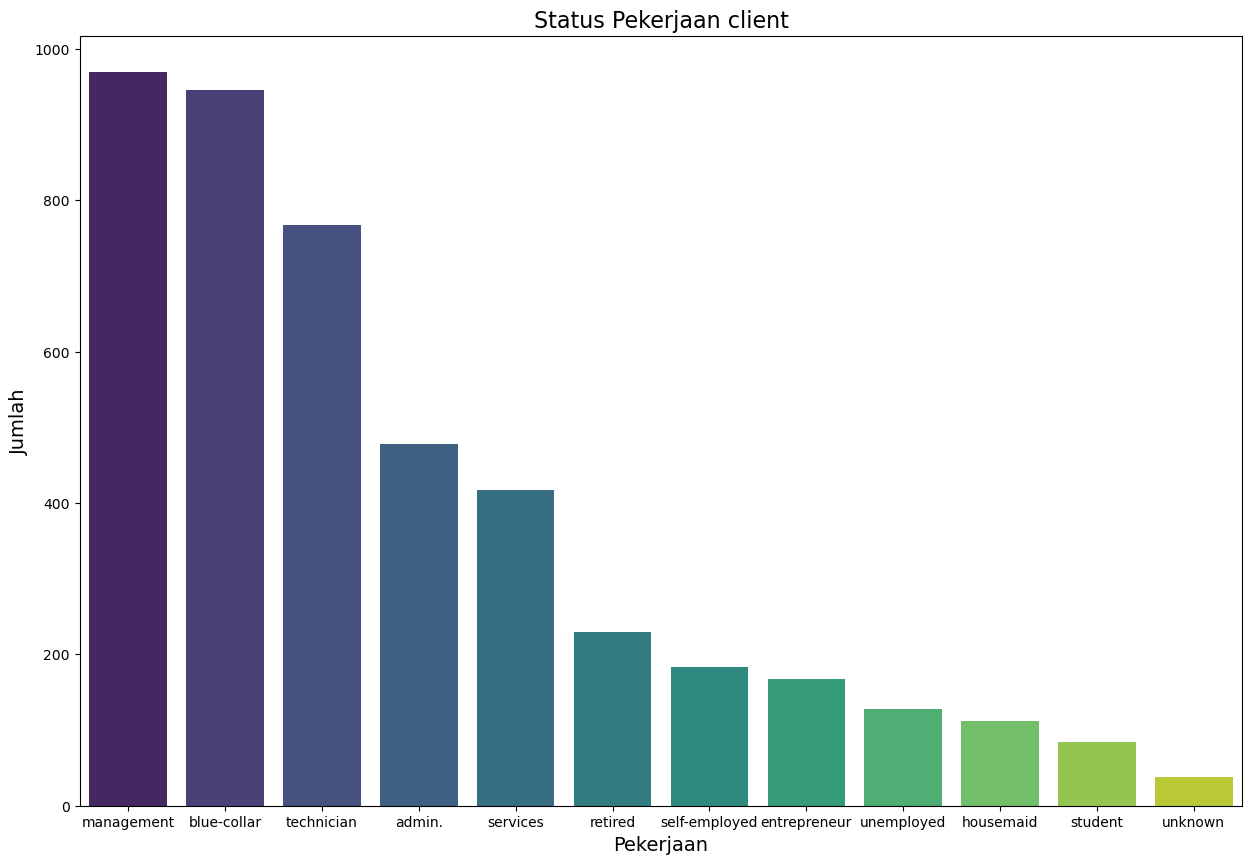

In [57]:
y=df1['job'].value_counts()
y = y.reset_index()
y.columns = ['job', 'Total']
display(y)

# Plot Bar Chart
plt.figure(figsize=(15, 10))
sns.barplot(x='job', y='Total', data=y, palette='viridis')

# Add title and labels
plt.title('Status Pekerjaan client', fontsize=16)
plt.xlabel('Pekerjaan', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Tampilkan Bar Chart
plt.show()

## 4.5 Analisis Distribusi Pendidikan Klien

,education,Total
0,secondary,2306
1,tertiary,1350
2,primary,678
3,unknown,187


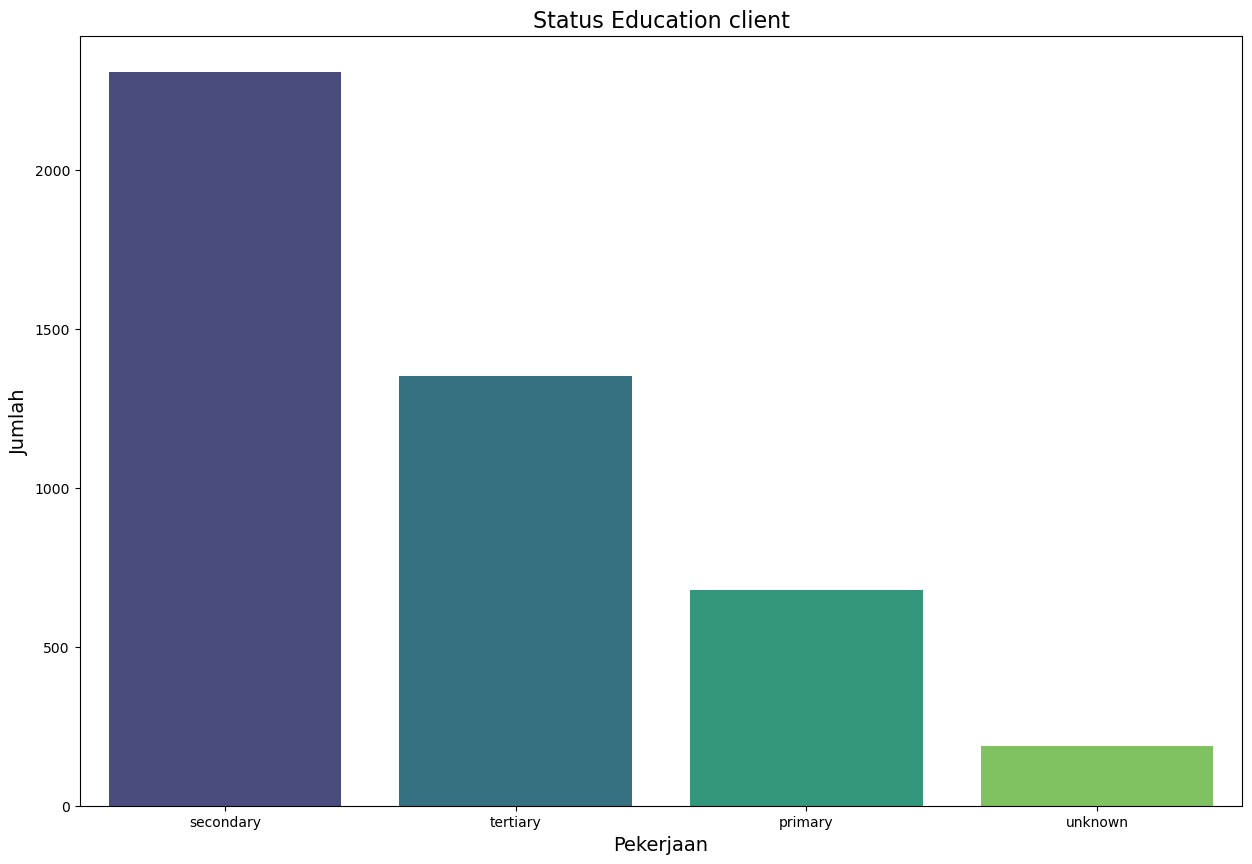

In [58]:
y=df1['education'].value_counts()
y = y.reset_index()
y.columns = ['education', 'Total']
display(y)

# Plot Bar Chart
plt.figure(figsize=(15, 10))
sns.barplot(x='education', y='Total', data=y, palette='viridis')

# Add title and labels
plt.title('Status Education client', fontsize=16)
plt.xlabel('Pekerjaan', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Tampilkan Bar Chart
plt.show()

Mayoritas klien memiliki tingkat pendidikan Sekunder (Pendidikan menengah) dengan jumlah 2306, dilanjut dengan tertiary (Pendidikan tinggi, misalnya, diploma, sarjana, pascasarjana) dengan jumlah 1350 lalu primary (Pendidikan dasar) dengan jumlah 678 dan yang terakhir status pendidikan yang unknown (tidak diketahui) dengan jumlah 187.

# 5. Feature Engineering

In [59]:
df2 = df1.copy()

Membuat duplikasi df1 disimpan pada df2 guna mempermudah

## 5.1 Split Data

In [60]:
df2['y'] = df2['y'].replace('yes', 1)
df2['y'] = df2['y'].replace('no', 0)

Mengganti 'Yes' dengan 1 dan 'No' dengan 0:<br>
'Yes': Diubah menjadi 1 (menandakan bahwa target atau kondisi yang diinginkan terpenuhi).
'No': Diubah menjadi 0 (menandakan bahwa target atau kondisi yang diinginkan tidak terpenuhi).

In [61]:
# split dataframe to X(feature) and y(target)
X = df2.drop('y', axis=1)
y = df2['y']

# display splitted data
print('fitur:', X.shape)
print('target:', y.shape)

# splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y, random_state=20)
y_train.value_counts()

fitur: (4521, 16)
target: (4521,)


y
0    3199
1     417
Name: count, dtype: int64

Melakukan split pada data menjadi feature train, feature tes, target train, dan target test. Pembagian feature dan target sesuai karena memiliki besar sama, untuk train sendiri didapat 3199 data yes dan 417 data no. Menggunakan stratify memastikan bahwa distribusi target dalam set pelatihan dan pengujian akan sama dengan distribusi target dalam dataset asli.

## 5.2 Cek Cardinality

In [62]:
# Create a looping for unique values details
listItem = []
for col in X_train.columns :
    listItem.append( [col,X_train[col].nunique(),X_train[col].unique()])

# Create into a dataframe
unique_val_df_train = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df_train

,Column Name,Number of Unique,Unique Sample
0,age,66,"[27, 31, 50, 58, 41, 34, 44, 57, 36, 25, 56, 3..."
1,job,12,"[blue-collar, technician, admin., retired, hou..."
2,marital,3,"[single, married, divorced]"
3,education,4,"[primary, tertiary, secondary, unknown]"
4,default,2,"[no, yes]"
5,balance,2016,"[-79, 23, 276, 2538, 920, 347, 759, 1, 2880, 5..."
6,housing,2,"[yes, no]"
7,loan,2,"[no, yes]"
8,contact,3,"[unknown, cellular, telephone]"
9,day,31,"[30, 25, 17, 31, 27, 6, 23, 15, 12, 29, 9, 20,..."


Dari 16 kolom didapat:<br>
Kategorikal (9):
- Ordinal: education
- Nominal: job, marital, default, housing, loan, contact, month, poutcome

Numerikal (7): age, balance, day, duration, campaign, pdays, previous

In [63]:
# Atribut Ordinal
ordinals = X_train[['education']].columns.to_list()

# Atribut Nominal
nominals = X_train[['job','marital','default','housing','loan',
                    'contact','month','poutcome']].columns.to_list()

# Atribut Numerikal
numerical = X_train[['age','balance','day','duration','campaign',
                     'pdays','previous']].columns.to_list()


Split kategorikal(ordinal+nominal) dan numerikal sehingga menjadi ordinals, nominals, numerical untuk mempermudah dalam pengecekan

## 5.3 Handling Outlier

In [64]:
#Melakukan proses outlier detection
def outlier_analysis(data):
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []
    outlier_types=[]
    outlier_handling = []

    #Memuat nama kolom
    for column in data.columns:
        col_name.append(column)
    
    #Mencari nilai skewness
        skewval = data[column].skew()
        skew.append(skewval)
    
    # Extreme Skew
        if skewval > 1 or skewval < -1:
            IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
            lower_boundary = data[column].quantile(0.25) - (IQR * 3)
            upper_boundary = data[column].quantile(0.75) + (IQR * 3)
            outlier_types.append('Extreme')
            outlier_handling.append('IQR 3')

        # Moderete skewed
        elif skewval >= 0.5 or skewval <= -0.5:
            IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
            lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
            outlier_types.append('Moderete')
            outlier_handling.append('IQR 1.5')
        # Normal distribusi
        else:
            std = data[column].std()
            lower_boundary = data[column].mean() - (std * 3)
            upper_boundary = data[column].mean() + (std * 3)
            outlier_types.append('Normal')
            outlier_handling.append('Gaussian')
        # Menambahkan ke kolom upper dan lower
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Chek apakah ada outlier
        outliers = (data[column] < lower_boundary) | (data[column] > upper_boundary)
        has_outliers.append(any(outliers))

    # Menambahkan dataset ke dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has outliers'] = has_outliers
    result['outlier types'] = outlier_types
    result['handling'] = outlier_handling

    return result

Fungsi untuk melakukan handling outlier dengan menghitung nilai skew dari data, untuk nilai extreme(IQR), skew >= 1 dan kurang dari <= -1. untuk nilai Medium(Quantile), skew >= 0,5 dan skew <= -0,5.
lalu sisanya normal(Gaussian)

In [65]:
# Select the data except categorical and target columns
dfb = outlier_analysis(X_train[numerical])
dfb

,columns,skewness,upper boundary,lower boundary,has outliers,outlier types,handling
0,age,0.659006,73.000000,9.00000,True,Moderete,IQR 1.5
1,balance,6.982472,5504.000000,-4003.75000,True,Extreme,IQR 3
2,day,0.099943,40.618668,-8.83327,False,Normal,Gaussian
3,duration,2.661856,998.000000,-564.75000,True,Extreme,IQR 3
4,campaign,4.315534,9.000000,-5.00000,True,Extreme,IQR 3
5,pdays,2.626202,-1.000000,-1.00000,True,Extreme,IQR 3
6,previous,5.594390,0.000000,0.00000,True,Extreme,IQR 3


Setelah melakukan cek outlier didapat 6 data memiliki outlier dengan type extreme sebanyak 2, moderete sebanyak 1, tidak ada outlier 1 untuk extreme pada kolom pdays dan previous tidak dimasukan karena upper dan lower sama

In [66]:
skew_moderete = ['age']
skew_extreme = ['balance', 'duration', 'campaign']
no_skew = ['day','pdays', 'previous']

membuat list yang berisi hasil dari cek outlier, selanjutnya Melakukan metode capping, capping sendiri berfungsi untuk mengubah data yang bersifat outlier menjadi normal dengan cara membatasi nilai dari 2 sisi, pembatasan dilakukan dengan lower boundary dan upper boundary, hanya melakukan filterisasi tetapi tidak menghapus data tersebut.

## 5.4 Capping

In [67]:
#capping skewed data
winsoriser_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skew_moderete)

X_train_capped_moderete = winsoriser_skew.fit_transform(X_train[skew_moderete])
X_test_capped_moderete = winsoriser_skew.transform(X_test[skew_moderete])

Capping skew moderete

In [68]:
#capping skewed data
winsoriser_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skew_extreme)

X_train_capped_extreme = winsoriser_skew.fit_transform(X_train[skew_extreme])
X_test_capped_extreme = winsoriser_skew.transform(X_test[skew_extreme])

Capping skew extreme

In [69]:
X_train_capped = pd.concat([X_train[no_skew],X_train_capped_moderete, X_train_capped_extreme, X_train[nominals + ordinals]], axis=1)
X_test_capped = pd.concat([X_test[no_skew],X_test_capped_moderete, X_test_capped_extreme, X_test[nominals + ordinals]], axis=1)

Melakukan concat untuk menggabungkan semua menjadi satu variabel

In [70]:
#function for histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Fungsi untuk memunculkan histogram dan boxplot sebelum dan sesudah capping

balance - Before Capping


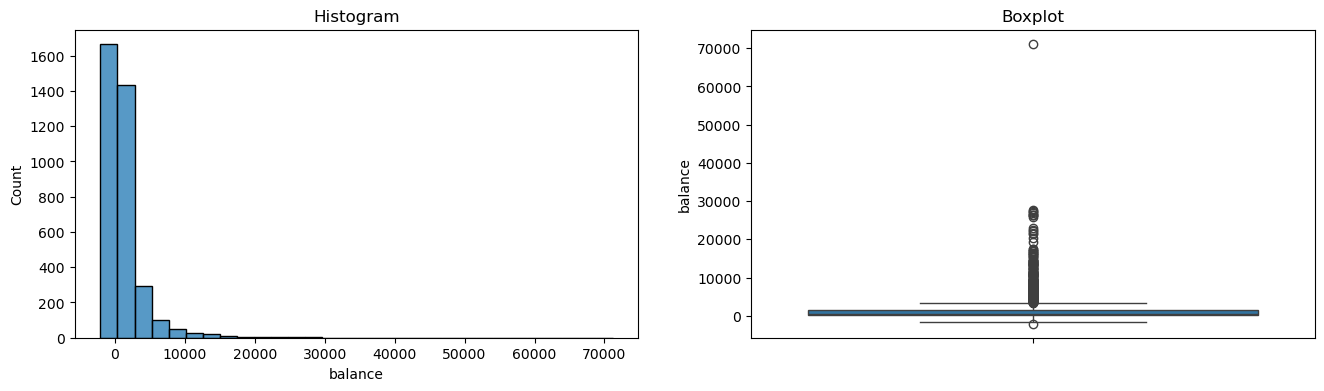


balance - After Capping


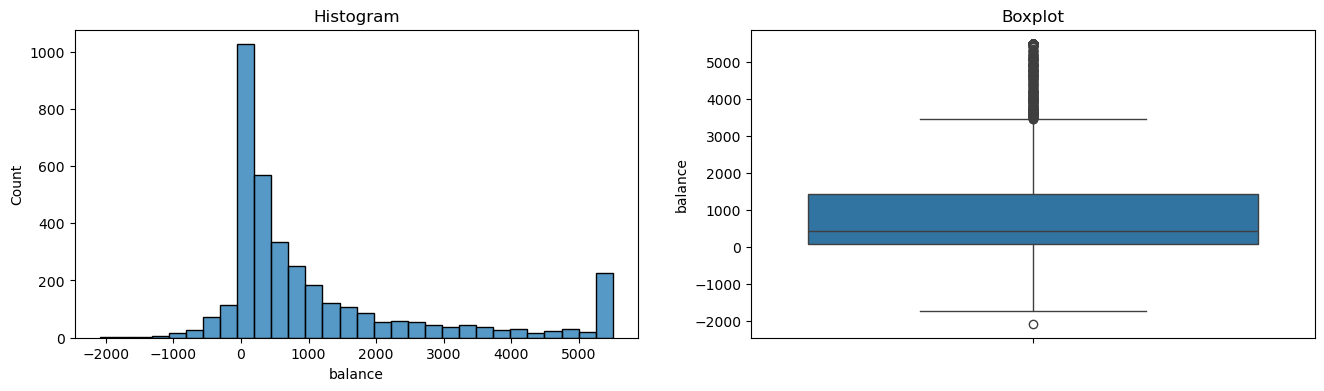

duration - Before Capping


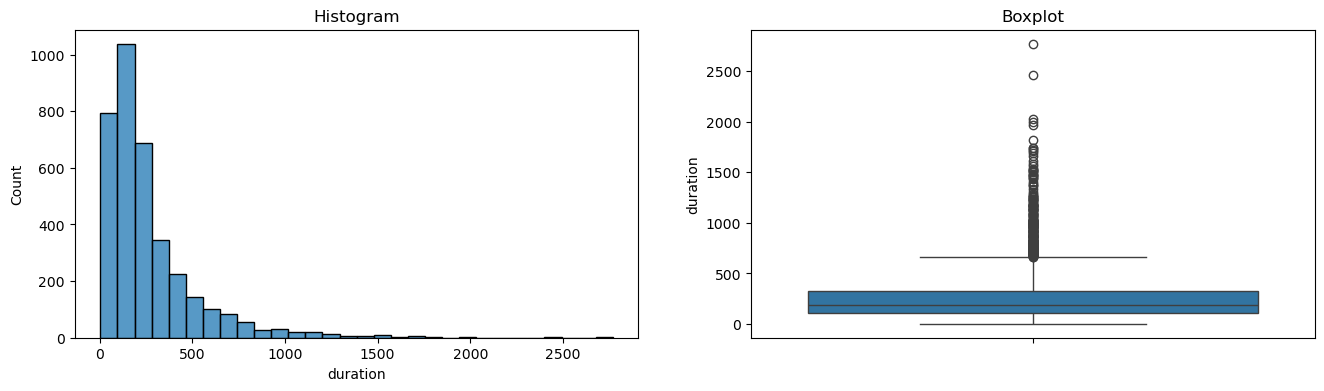


duration - After Capping


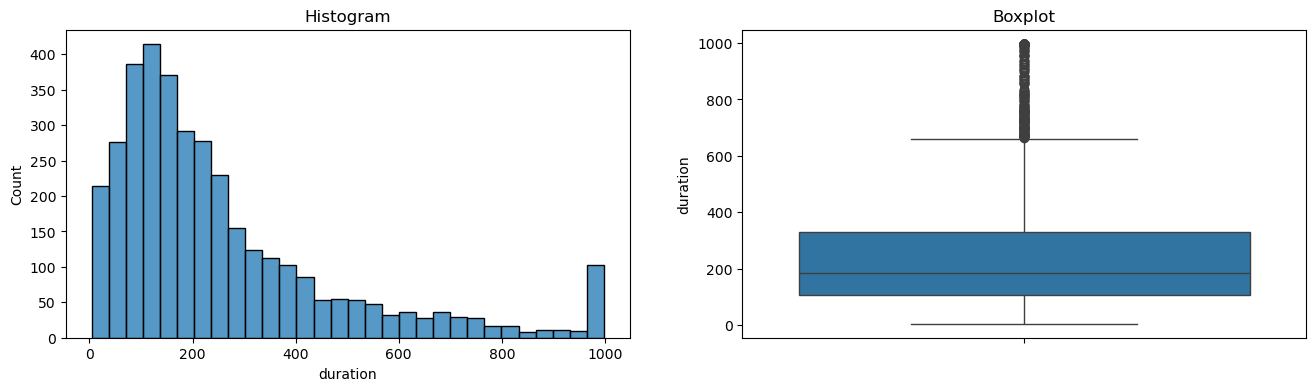

campaign - Before Capping


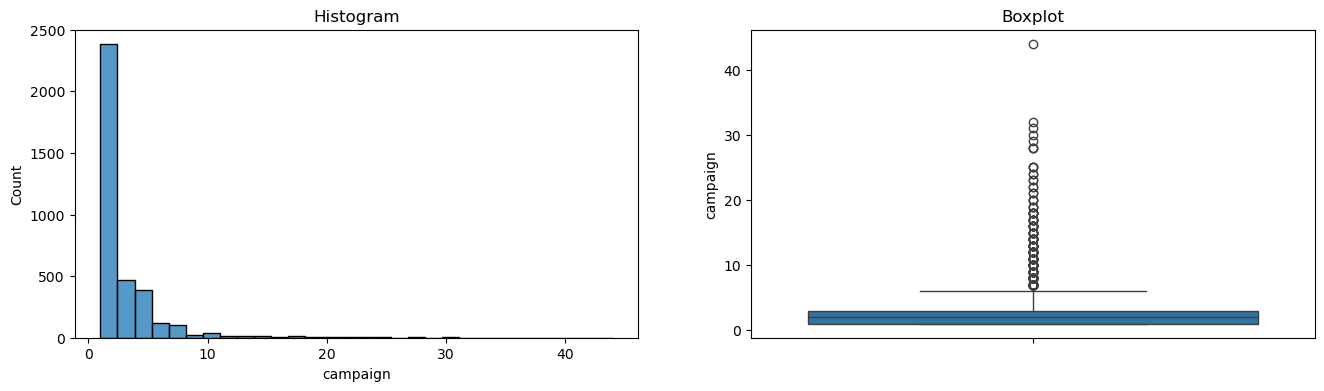


campaign - After Capping


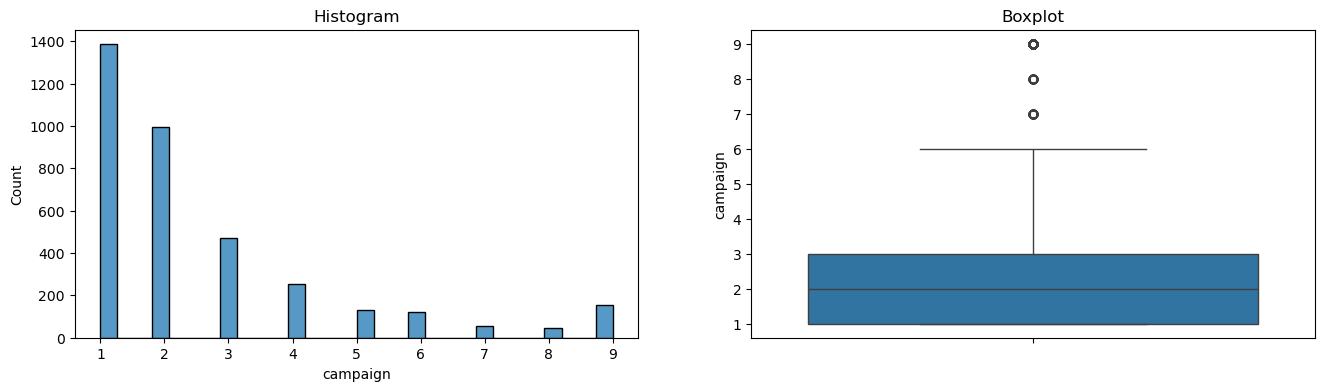

age - Before Capping


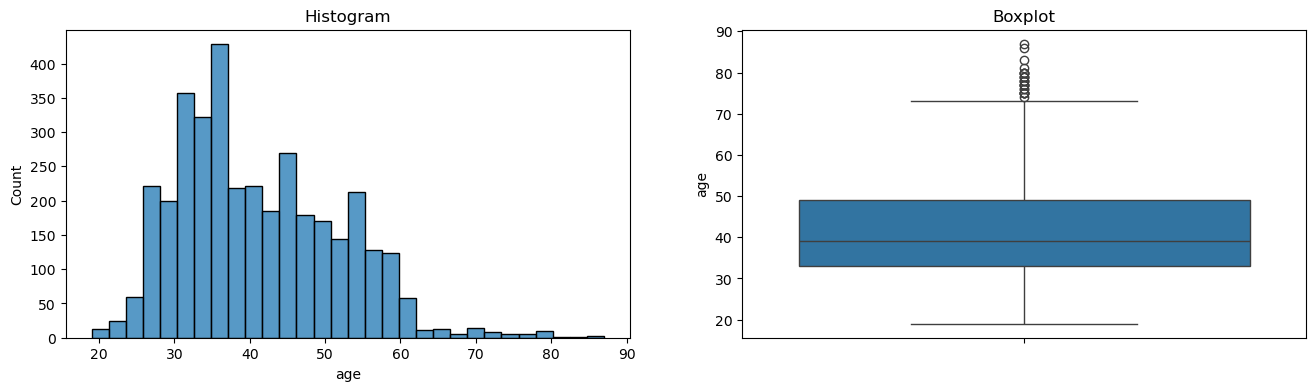


age - After Capping


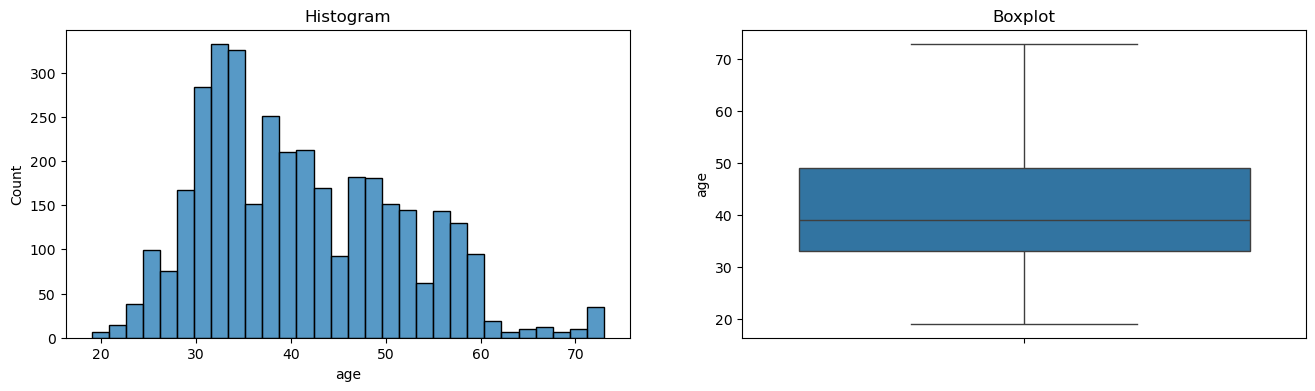

In [71]:
#loop outlier columns
for col in X_train[skew_extreme+skew_moderete]:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped[skew_extreme+skew_moderete], col)

Berikut perubahan sebelum dan sesudah outlier dihilangkan

## 5.5 Feature Selection

In [72]:
X_train_capped

,day,pdays,previous,age,balance,duration,campaign,job,marital,default,housing,loan,contact,month,poutcome,education
1229,30,-1,0,27,-79,385,5,blue-collar,single,no,yes,no,unknown,may,unknown,primary
2418,25,-1,0,31,23,121,3,technician,single,no,no,no,cellular,aug,unknown,tertiary
317,17,-1,0,50,276,641,6,admin.,married,no,no,yes,unknown,jun,unknown,primary
656,31,-1,0,58,2538,307,6,retired,divorced,no,yes,no,cellular,jul,unknown,primary
539,27,-1,0,41,920,239,1,admin.,married,no,yes,yes,unknown,may,unknown,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,19,-1,0,35,1253,210,2,management,married,no,yes,no,unknown,may,unknown,tertiary
464,10,99,5,32,889,185,1,blue-collar,married,no,yes,no,cellular,sep,success,secondary
943,20,-1,0,40,109,402,9,technician,married,no,no,no,unknown,jun,unknown,secondary
1687,15,-1,0,44,809,118,4,technician,divorced,no,yes,no,unknown,may,unknown,secondary


Dataframe dari data setelah handling outlier

### 5.5.1 Ordinal Selection

In [73]:
# ordinals columns
ordinals

# Perform Kendall's Tau test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'tau-statistic', 'p-value', 'is_correlated'])

for cat_column in ordinals:
    # Convert categories to ordered numbers
    cat_column_num = X_train_capped[cat_column].astype('category').cat.codes
    y_train_num = y_train.astype('category').cat.codes
    
    tau, p = kendalltau(cat_column_num, y_train_num)
    
    # Determine if correlated based on tau-statistic
    is_correlated = 'Yes' if (tau >= 0.1 or tau <= -0.1) else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'tau-statistic': [tau], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the Kendall's Tau test results DataFrame for categorical columns
correlation_df_categorical


,categorical_column,tau-statistic,p-value,is_correlated
0,education,0.042925,0.006215,No


Seleksi ordinal menggunakan metode kendal dimana apabila tau-staatistic >= 0.1 dan tau-statistic <= -0,1 maka memiliki korelasi dengan target<br>
kolom education tidak memiliki korelasi

### 5.5.2 Nominal Selection

In [74]:
# Nominal columns
nominals

# Set the significance level (alpha)
alpha = 0.05

# Perform chi-squared test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in nominals:
    contingency_table = pd.crosstab(X_train_capped[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test results DataFrame for categorical columns
correlation_df_categorical

,categorical_column,chi2-statistic,p-value,is_correlated
0,job,46.090439,3.116518e-06,Yes
1,marital,15.187719,5.035338e-04,Yes
2,default,0.000314,9.858590e-01,No
3,housing,39.887882,2.689668e-10,Yes
4,loan,11.961109,5.432254e-04,Yes
5,contact,68.029318,1.688967e-15,Yes
6,month,182.694973,2.846131e-33,Yes
7,poutcome,309.917559,7.099290e-67,Yes


Seleksi nominal menggunakan metode chi squared dimana apabila p-value < 0,05 maka memiliki korelasi dengan target<br>
didapat kolom job, marital, housing, loan, contact, month, dan poutcome memiliki korelasi

### 5.5.3 Numerikal selection

In [75]:
# Selecting numeric columns
numerical

# Perform correlation test for each continuous and discrete column
correlation_df_num = pd.DataFrame(columns=['numerical column', 'rho-statistic', 'p-value', 'is_correlated'])

for cont_column in numerical:
    corr, p = spearmanr(X_train_capped[cont_column], y_train)
    
    # Determine if correlated based on Spearman's correlation coefficient
    is_correlated = 'Yes' if (abs(corr) >= 0.1) else 'No'
    
    # Use pd.concat to concatenate the DataFrames
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'rho-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the correlation test results DataFrame for continuous columns
correlation_df_num


,numerical column,rho-statistic,p-value,is_correlated
0,age,0.020729,2.126873e-01,No
1,balance,0.076627,3.968286e-06,No
2,day,-0.003481,8.342385e-01,No
3,duration,0.337865,2.955673e-97,Yes
4,campaign,-0.073538,9.576492e-06,No
5,pdays,0.140200,2.462529e-17,Yes
6,previous,0.155645,4.794867e-21,Yes


Seleksi Numerical menggunakan metode spearman dimana apabila rho-staatistic >= 0.1 dan rho-statistic <= -0,1 maka memiliki korelasi dengan target<br>
didapat hanya kolom duration, pdays, previous memiliki korelasi

In [76]:
numerical = ['duration', 'pdays', 'previous']
nominals = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'poutcome']

Fitur fitur yang dipilih dari nominals dan numerical, ordinal tidak termasuk karena tidak memiliki korelasi

In [77]:
X_train_final = X_train_capped[numerical+nominals]
X_test_final = X_test_capped[numerical+nominals]
X_train_final

,duration,pdays,previous,job,marital,housing,loan,contact,month,poutcome
1229,385,-1,0,blue-collar,single,yes,no,unknown,may,unknown
2418,121,-1,0,technician,single,no,no,cellular,aug,unknown
317,641,-1,0,admin.,married,no,yes,unknown,jun,unknown
656,307,-1,0,retired,divorced,yes,no,cellular,jul,unknown
539,239,-1,0,admin.,married,yes,yes,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...,...
1772,210,-1,0,management,married,yes,no,unknown,may,unknown
464,185,99,5,blue-collar,married,yes,no,cellular,sep,success
943,402,-1,0,technician,married,no,no,unknown,jun,unknown
1687,118,-1,0,technician,divorced,yes,no,unknown,may,unknown


Berikut dataframe yang berisi kolom kolom yang berkorelasi

In [78]:
smotenc = SMOTENC([3, 4, 5, 6, 7, 8, 9], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_final,y_train)
y_train_balanced.value_counts()

y
0    3199
1    3199
Name: count, dtype: int64

SMOTENC digunakan untuk menangani data (kategorikal dan numerikal) yang imbalance. Ini berarti setelah resampling, jumlah untuk masing-masing kelas adalah 3199, menunjukkan bahwa kelas target telah seimbang.

## 5.6 Encoding dan Scalling

### 5.6.1 Pipeline Encoding dan Scalling

In [79]:
num_pipeline = make_pipeline(
    MinMaxScaler())

nom_pipeline = make_pipeline(
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'))

# Define the preprocessing pipeline
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('pipe_num', num_pipeline, numerical),  # Transformer for numerical columns
        ('pipe_cat', nom_pipeline, nominals),   # Transformer for nominal columns
    ]
)
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['duration', 'pdays', 'previous']),
                                ('pipe_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['job', 'marital', 'housing', 'loan',
                                  'contact', 'month', 'poutcome'])])

Membuat pipeline yang berisi encoding untuk nominal menggunakan OneHotEncoder dan menggunakan MinMaxScaler untuk scalling data numerikal

# 6. Model Definition

Pada data target 'y' angka 1 adalah sudah melakukan deposito berjangka<br>
Recall adalah metrik utama yang harus di fokuskan karena ingin meminimalkan False Negatives (FN)
|           | Actual Positive | Actual Negative |
|-----------|-----------------|-----------------|
| **Predicted Positive** | True Positive (TP) | False Positive (FP) |
| **Predicted Negative** | False Negative (FN) | True Negative (TN) |

## 6.1 Pipeline Model

In [80]:
knn_pipeline = make_pipeline(
    preprocessing_pipeline,  # Preprocessing
    KNeighborsClassifier()  # Model KNN
)

svm_pipeline = make_pipeline(
    preprocessing_pipeline,  # Preprocessing
    SVC(class_weight = 'balanced',random_state=42)  # Model SVM
)

dt_pipeline = make_pipeline(
    preprocessing_pipeline,  # Preprocessing
    DecisionTreeClassifier(class_weight = 'balanced',random_state=42)  # Model Decision Tree
)

rf_pipeline = make_pipeline(
    preprocessing_pipeline,  # Preprocessing
    RandomForestClassifier(class_weight = 'balanced',random_state=42)  # Model Random Forest
)

ada_pipeline = make_pipeline(
    preprocessing_pipeline,  # Preprocessing yang telah Anda buat
    AdaBoostClassifier(random_state=42)  # Model AdaBoost
)

display(svm_pipeline)
display(dt_pipeline)
display(rf_pipeline)
display(knn_pipeline)
display(ada_pipeline)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('svc', SVC(class_weight='balanced', random_state=42))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

Membuat 5 pipeline dengan model KNN, SVM, Decision Tree, Random Forest, Adaboost.<br>
Setelah data nominal dilakukan onehotencoder, dan numerikal dilakukan minmaxscaler lalu selanjutnya dilakukan KNN, SVM, Decision Tree, Random Forest, dan AdaboostClassifier pada SVM, DecisionTree, RandomForest menggunakan class_weight='balanced' untuk memaksa model melakukan balancing data

# 7. Model Training

## 7.1 Cross-validation

Cross-validation adalah metode dalam statistik untuk mengevaluasi kinerja model dan mengukur seberapa baik model tersebut akan bekerja. Tujuannya adalah untuk mendapatkan estimasi yang lebih akurat tentang performa model dan menghindari overfitting serta underfitting.

### 7.1.1 Data Tanpa SMOTE

In [81]:
from sklearn.model_selection import StratifiedKFold
print('DATA TANPA SMOTE')
skfold=StratifiedKFold(n_splits=5)

scoring = make_scorer(recall_score, pos_label=1)

# checking cross validation score
cv_knn_model = cross_val_score(knn_pipeline, X_train_final, y_train, cv=skfold, scoring=scoring)
cv_svm_model = cross_val_score(svm_pipeline, X_train_final, y_train, cv=skfold, scoring=scoring)
cv_dt_model = cross_val_score(dt_pipeline, X_train_final, y_train, cv=skfold, scoring=scoring)
cv_rf_model = cross_val_score(rf_pipeline, X_train_final, y_train, cv=skfold, scoring=scoring)
cv_ada_model = cross_val_score(ada_pipeline, X_train_final, y_train, cv=skfold, scoring=scoring)
name_model_ = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_ada_model],['knn_pipeline','svm_pipeline','dt_pipeline','rf_pipeline','ada_pipeline']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

DATA TANPA SMOTE
knn_pipeline
recall - All - Cross Validation  :  [0.17857143 0.15662651 0.09638554 0.12048193 0.21428571]
recall - Mean - Cross Validation :  0.15327022375215146
recall - Std - Cross Validation  :  0.041677919902973266
recall - Range of Test-Set       :  0.1115923038491782 - 0.19494814365512472
--------------------------------------------------
svm_pipeline
recall - All - Cross Validation  :  [0.73809524 0.8313253  0.74698795 0.72289157 0.75      ]
recall - Mean - Cross Validation :  0.7578600114744694
recall - Std - Cross Validation  :  0.0379224700779021
recall - Range of Test-Set       :  0.7199375413965673 - 0.7957824815523714
--------------------------------------------------
dt_pipeline
recall - All - Cross Validation  :  [0.38095238 0.30120482 0.38554217 0.38554217 0.4047619 ]
recall - Mean - Cross Validation :  0.3716006884681583
recall - Std - Cross Validation  :  0.03614257477895626
recall - Range of Test-Set       :  0.33545811368920203 - 0.4077432632471146


Melakukan cross-validation adalah cara penting untuk mengevaluasi kinerja model<br> Disini melakukan cross-validation dengan 5 model pipeline(KNN,SVM,DT,RF,ADA) dengan data X_train_final(sebelum smote) didapat: <br>

| Metric          | Value        |
|-----------------|--------------|
| Best model      | svm_pipeline |
| Cross-val mean   | 0.757860     |

Model SVM menunjukkan kinerja terbaik di antara semua model dengan recall yang jauh lebih tinggi dibandingkan yang lain, Variasi kinerjanya juga cukup stabil, seperti yang terlihat dari standar deviasi yang kecil.

### 7.1.2 Data Melalui SMOTE

In [82]:
print("DATA MELALUI SMOTE")
skfold=StratifiedKFold(n_splits=5)

scoring = make_scorer(recall_score, pos_label=1)

# checking cross validation score
cv_knn_model = cross_val_score(knn_pipeline, X_train_balanced, y_train_balanced, cv=skfold, scoring=scoring)
cv_svm_model = cross_val_score(svm_pipeline, X_train_balanced, y_train_balanced, cv=skfold, scoring=scoring)
cv_dt_model = cross_val_score(dt_pipeline, X_train_balanced, y_train_balanced, cv=skfold, scoring=scoring)
cv_rf_model = cross_val_score(rf_pipeline, X_train_balanced, y_train_balanced, cv=skfold, scoring=scoring)
cv_ada_model = cross_val_score(ada_pipeline, X_train_balanced, y_train_balanced, cv=skfold, scoring=scoring)
name_model_smote = []
cv_scores_smote=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_ada_model],['knn_pipeline','svm_pipeline','dt_pipeline','rf_pipeline','ada_pipeline']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores_smote:
        cv_scores_smote = cv.mean()
        name_model_smote = name
    else:
        pass
print('best model:', name_model_smote)
print('cross-val mean:', cv_scores_smote)

DATA MELALUI SMOTE
knn_pipeline
recall - All - Cross Validation  :  [0.834375   0.9515625  0.9515625  0.95931142 0.9546875 ]
recall - Mean - Cross Validation :  0.9302997848200313
recall - Std - Cross Validation  :  0.04804624089736393
recall - Range of Test-Set       :  0.8822535439226673 - 0.9783460257173953
--------------------------------------------------
svm_pipeline
recall - All - Cross Validation  :  [0.8109375  0.94375    0.9359375  0.95305164 0.93125   ]
recall - Mean - Cross Validation :  0.9149853286384977
recall - Std - Cross Validation  :  0.05254699665233818
recall - Range of Test-Set       :  0.8624383319861595 - 0.9675323252908359
--------------------------------------------------
dt_pipeline
recall - All - Cross Validation  :  [0.759375   0.921875   0.94375    0.93740219 0.9234375 ]
recall - Mean - Cross Validation :  0.8971679381846636
recall - Std - Cross Validation  :  0.06939179515113421
recall - Range of Test-Set       :  0.8277761430335293 - 0.9665597333357978
-

Melakukan cross-validation adalah cara penting untuk mengevaluasi kinerja model, disini melakukan cross-validation dengan 5 model pipeline(KNN,SVM,DT,RF,ADA) dengan data X_train_final(sebelum smote) didapat: <br>
| Metric          | Value         |
|-----------------|---------------|
| Best model      | rf_pipeline   |
| Cross-val mean   | 0.935615      |

Model RandomForestClassifier menunjukkan kinerja terbaik di antara semua model dengan recall yang jauh lebih tinggi dibandingkan yang lain, Variasi kinerjanya juga cukup stabil, seperti yang terlihat dari standar deviasi yang kecil.

## 7.2 Model Final

In [83]:
print('Data tidak menggunakan SMOTE')
print('best model:', name_model)
print('cross-val mean:', cv_scores)
print('\nData menggunakan SMOTE')
print('best model:', name_model_smote)
print('cross-val mean:', cv_scores_smote)

rf_pipeline.fit(X_train_balanced,y_train_balanced)

Data tidak menggunakan SMOTE
best model: svm_pipeline
cross-val mean: 0.7578600114744694

Data menggunakan SMOTE
best model: rf_pipeline
cross-val mean: 0.9356147300469482


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

Melakukan perbandingan antara data sudah dilakukan SMOTE dan tidak dengan menggunakan model yang sudah dilakukan balancing, didapat data pada SMOTE memiliki kinerja yang lebih baik dibanding tidak selisih yang cukup besar sekitar 15-20%. jadi saya memutuskan untuk menggunakan randomforestclassifier 

## 7.3 Hyperparameter

In [84]:
# Define Hyperparameters
n_estimators = [100,200,500,1000]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_search_params = {
    'randomforestclassifier__n_estimators': n_estimators,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf
}
# Setup RandomizedSearchCV with your pipeline
rf_randomcv = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=random_search_params,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds for cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available processors
    scoring=scoring  # Use recall as the metric to optimize
)

# Fit RandomizedSearchCV on balanced training data
rf_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('minmaxscaler',
                                                                                                MinMaxScaler())]),
                                                                               ['duration',
                                                                                'pdays',
                                                                                'previous']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                '...
                                                                     random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [10,
                                                                              120,
                                                                              230,
                                                                              340,
                                                                              450,
                                                                              560,
                                                                              670,
                                                                              780,
                                                                              890,
                                                                              1000],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4,
                                                                                     6,
                                                                                     8],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10,
                                                                                      14],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200,
                                                                                 500,
                                                                                 1000]},
                   random_state=42,
                   scoring=make_scorer(recall_score, pos_label=1))

Melakukan hyperparameter dengan estimator antara 100, 200, 500, 1000 dengan max depth 10-1000 dengan kelipatan 10, min sample split 2,5,10,14 lalu untuk min_sample_leaf 1,2,4,6,8 lalu menggunakan RandomizedSearchCV dengan nilai iter = 10, cv = 5, random state = 42, n_jobs = -1, lalu scoring = recall karena yang akan kita fokuskan adalah nilai recall (FN)

In [85]:
print('--- Randomized SearchCV Results ---')
print('Best cross-validation recall:', rf_randomcv.best_score_)
print('Best parameters:', rf_randomcv.best_params_)
print('Test set recall:', rf_randomcv.score(X_test, y_test))

--- Randomized SearchCV Results ---
Best cross-validation recall: 0.9421762519561817
Best parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_depth': 1000}
Test set recall: 0.7211538461538461


Didapat nilai estimator terbaik 100, dengan min sample split 10, min sample leaf 4, max depth 1000
didapat nilai test menjadi 0,72

## 8. Model Evaluation

Evaluasi model membantu kita untuk memahami seberapa baik model dapat memprediksi atau mengklasifikasikan data baru. Dalam hal ini kita akan melihat nilai recall karena yang kita cari adalah False Negatif dimana memprediksi kemungkinan orang memilih 'yes' tetapi dianggap 'no' (orang ingin melaukan deposito tetapi tidak dianggap)

In [86]:
best_estimatorrf = rf_randomcv.best_estimator_
best_estimatorrf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['duration', 'pdays',
                                                   'previous']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'poutcome'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=1000,
                                        min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

Model pipeline terbaik RandomForestClassifier untuk selanjutnya :

- **class_weight='balanced'**: 
  - Digunakan untuk menangani data yang tidak seimbang (imbalance) dengan menyesuaikan bobot kelas secara otomatis. Ini membantu model untuk tidak bias terhadap kelas yang lebih sering muncul.

- **max_depth=1000**: 
  - Menentukan kedalaman maksimum dari setiap pohon keputusan dalam RandomForest. Dengan nilai ini, pohon dapat tumbuh sangat dalam, memungkinkan model untuk menangkap pola yang sangat kompleks. Namun, ini juga berisiko menyebabkan overfitting.

- **min_samples_leaf=4**: 
  - Menetapkan jumlah minimum sampel yang harus ada di daun (node akhir) pohon keputusan. Ini memastikan bahwa setiap daun memiliki setidaknya 4 sampel, membantu mengurangi overfitting dengan menghindari daun yang terlalu kecil.

- **min_samples_split=10**: 
  - Menentukan jumlah minimum sampel yang diperlukan untuk membagi node internal. Node internal harus memiliki setidaknya 10 sampel sebelum dapat dibagi lebih lanjut, mencegah pembagian node yang menghasilkan subset terlalu kecil.

- **random_state=42**: 
  - Menetapkan nilai acak untuk memastikan bahwa hasil model dapat direproduksi. Dengan nilai ini, proses pelatihan model akan konsisten setiap kali kode dijalankan, memungkinkan eksperimen yang dapat diulang.


In [87]:
def performance_check(model, X, y):
    y_pred = model.predict(X)
    recall = recall_score(y, y_pred)
    return recall

Fungsi untuk membantu dalam mencari nilai recall

In [88]:
# Check the Performance
print("Sebelum Hyper")
print('Recall - Train : ', performance_check(rf_pipeline, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', performance_check(rf_pipeline, X_test_final, y_test))

# Check the Performance
print("Setelah Hyper")
print('Recall - Train : ', performance_check(best_estimatorrf, X_train_balanced, y_train_balanced))
print('Recall - Test  : ', performance_check(best_estimatorrf, X_test_final, y_test))

Sebelum Hyper
Recall - Train :  0.9993748046264458
Recall - Test  :  0.5480769230769231
Setelah Hyper
Recall - Train :  0.9662394498280713
Recall - Test  :  0.7211538461538461


**Sebelum Tuning Hyperparameter:**: 
- Model menunjukkan **overfitting** dengan recall yang sangat tinggi pada data pelatihan tetapi recall yang rendah pada data pengujian. Ini mengindikasikan bahwa model sangat cocok dengan data pelatihan namun tidak berkinerja baik pada data yang tidak terlihat..

**Setelah Tuning Hyperparameter:**: 
- Model menunjukkan **perbaikan yang signifikan** dalam recall pada data pengujian, dengan sedikit penurunan recall pada data pelatihan. Ini menunjukkan bahwa tuning hyperparameter telah membantu model untuk lebih baik dalam generalisasi ke data baru, mengurangi overfitting, dan meningkatkan performa pada data pengujian.


In [89]:
y_pred_test = rf_pipeline.predict(X_test_final)
y_pred_test_hyper = best_estimatorrf.predict(X_test_final)

pada y_pred_test : Kode ini menghasilkan prediksi pada data pengujian (X_test_final) menggunakan pipeline model sebelum tuning hyperparameter (rf_pipeline).

pada y_pred_test_hyper : Kode ini menghasilkan prediksi pada data pengujian (X_test_final) menggunakan model yang telah di-tune hyperparameternya (best_estimatorrf).

Classification Report pada data test: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       801
           1       0.51      0.55      0.53       104

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.89      0.89      0.89       905
 

Recall - Data Train :  0.9952038369304557
Recall - Data Test  :  0.5480769230769231


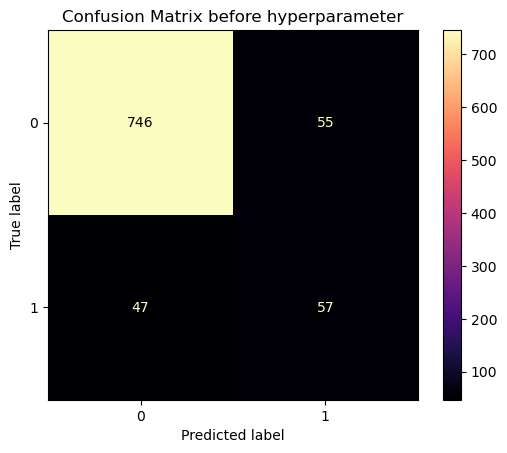

In [90]:
print('Classification Report pada data test: \n', classification_report(y_test, y_pred_test), '\n')
matrix1 = ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test_final, y_test,cmap='magma')
matrix1.ax_.set_title('Confusion Matrix before hyperparameter')
# Check the Performance
print('Recall - Data Train : ', performance_check(rf_pipeline, X_train_final, y_train))
print('Recall - Data Test  : ', performance_check(rf_pipeline, X_test_final, y_test))

Didapat hasil report pada data test yang menggunakan prediksi dari rf_pipeline (tanpa hyperparameter) didapat nilai recall pada class 0 adalah 0,93 dan pada class 1 didapat 0,55 dengan melihat persebaran data, data termasuk imbalance, melihat dari nilai recall saat train dan saat test terlihat bahwa data kemungkinan overfitting

Classification Report pada data Test: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       801
           1       0.48      0.72      0.58       104

    accuracy                           0.88       905
   macro avg       0.72      0.81      0.75       905
weighted avg       0.91      0.88      0.89       905
 

Recall - Data Train :  0.8489208633093526
Recall - Data Test  :  0.7211538461538461


<function matplotlib.pyplot.show(close=None, block=None)>

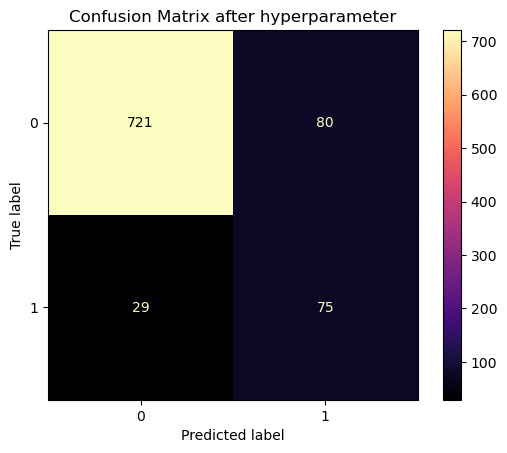

In [91]:
print('Classification Report pada data Test: \n', classification_report(y_test, y_pred_test_hyper), '\n')
matrix2 = ConfusionMatrixDisplay.from_estimator(best_estimatorrf, X_test_final, y_test,cmap='magma')
matrix2.ax_.set_title('Confusion Matrix after hyperparameter')
# Check the Performance
print('Recall - Data Train : ', performance_check(best_estimatorrf, X_train_final, y_train))
print('Recall - Data Test  : ', performance_check(best_estimatorrf, X_test_final, y_test))
plt.show

Didapat hasil report pada data test yang menggunakan prediksi dari best_estimatorrf (setelah hyperparameter) didapat nilai recall untuk kelas 1 meningkat signifikan dari 0.55 menjadi 0.72. Ini menunjukkan bahwa model sekarang lebih baik dalam mendeteksi kasus-kasus positif.

**Insight:**<br>
|           | Actual Positive (1) | Actual Negative (0) |
|-----------|----------------------|---------------------|
| **Predicted Positive (1)** | True Positive (75)     | False Positive (80)  |
| **Predicted Negative (0)** | False Negative (29)    | True Negative (721)  |

Recall untuk Kelas 1 (Positive Class) Meningkat:<br>
Sebelum tuning: Recall = 0.55<br>
Sesudah tuning: Recall = 0.72<br>
Peningkatan recall menunjukkan bahwa model sekarang lebih baik dalam mengidentifikasi kasus positif yang sebenarnya.<br>
Hyperparameter tuning berhasil meningkatkan kemampuan model dalam mendeteksi kasus positif (kelas 1) dengan mengorbankan sedikit peningkatan pada false positives. Ini adalah peningkatan yang signifikan untuk aplikasi di mana mendeteksi kasus positif sangat penting.

## 8.1 Error Analysis

In [92]:
dfx = df.copy()
kolom = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
dfx2 = dfx[kolom]
dfx2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


Membuat dataframe baru untuk mencaritahu pengujian error

In [93]:
inf_pred = best_estimatorrf.predict(dfx2)
dfx2['predict'] = inf_pred
dfx2['y'] = dfx['y']
dfx2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,predict,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0,no


Memasukan kolom predict adalah prediksi dari model kita sedangkan kolom y adalah target sebenarnya dari data

In [94]:
noyes = dfx2[(dfx2['y'] == 'no') & (dfx2['predict'] == 1)]
noyes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,predict,y
51,37,technician,single,secondary,no,228,yes,no,cellular,20,aug,1740,2,-1,0,unknown,1,no
61,63,retired,married,secondary,no,415,yes,no,cellular,7,oct,323,1,-1,0,unknown,1,no
64,56,admin.,married,secondary,no,16873,no,no,cellular,7,oct,223,1,-1,0,unknown,1,no
78,50,blue-collar,divorced,primary,no,388,no,no,cellular,5,feb,701,1,-1,0,unknown,1,no
87,35,blue-collar,single,primary,no,293,yes,no,unknown,30,may,521,2,-1,0,unknown,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,23,blue-collar,married,primary,no,1158,yes,no,cellular,16,apr,743,1,-1,0,unknown,1,no
4481,43,services,married,secondary,no,642,no,no,cellular,31,jul,644,2,-1,0,unknown,1,no
4498,31,management,married,tertiary,no,1183,yes,no,unknown,27,may,676,6,-1,0,unknown,1,no
4512,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,1,no


Error pada kesalahan dalam prediksi 361 yang seharusnya NO tapi dianggap YES<br>
total sebanyak 361

In [95]:
yesno = dfx2[(dfx2['y'] == 'yes') & (dfx2['predict'] == 0)]
yesno

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,predict,y
37,32,blue-collar,married,secondary,no,2089,yes,no,cellular,14,nov,132,1,-1,0,unknown,0,yes
83,52,services,married,secondary,no,657,no,no,telephone,7,jul,398,2,460,2,failure,0,yes
114,25,student,single,secondary,no,331,no,no,telephone,26,aug,170,4,-1,0,unknown,0,yes
115,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,0,yes
271,24,blue-collar,single,secondary,no,174,yes,yes,cellular,18,may,487,1,-1,0,unknown,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,34,housemaid,married,primary,no,2929,no,no,cellular,14,aug,518,2,-1,0,unknown,0,yes
4328,49,admin.,married,secondary,no,3608,yes,no,unknown,13,nov,231,1,-1,0,unknown,0,yes
4388,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,0,yes
4402,41,entrepreneur,married,primary,no,39,yes,no,cellular,21,nov,549,2,-1,0,unknown,0,yes


Error pada kesalahan dalam prediksi 92 yang seharusnya YES tapi dianggap NO<br>
total sebanyak 92

**Insight:**
Pada analysis error saya mengetahui bahwasannya dalam data 4521 terdapat error pada pemilihan prediksi sebanyak 453

# 9. Model Saving

In [96]:
with open('pipeline_model.pkl', 'wb') as file_1:
  pickle.dump(best_estimatorrf, file_1)

Dikarenakan yang ingin disimpan adalah model terbaik saja maka kita menyimpan variabel 'best_estimatorrf' model yang menggunakan RandomForest dan juga sudah dilakukan hyperparameter

# 11. Kesimpulan

1. Pada EDA terlihat bahwasanya target 0 dan 1 memiliki data imbalance atau tidak seimbang dan jaraknya sangat jauh dimana berlangganan(1) = 521 (11,5%),Tidak berlangganan(0) = 4000 (88,5%).<br>
2. prediksi yang akan kita gunakan adalah recall karena yang akan dicari adalah jenis False Negatif (FN) orang yang berlangganan tetapi prediksi tidak berlangganan dikarenakan hal seperti ini akan membuat menggurangi potensi keuntungan bank.<br>
3. Fitur yang mempengaruhi target `duration`, `pdays`, `previous`, `job`, `marital`, `housing`, `loan`, `contact`, `month`, `poutcome`.<br>
4. pada recall dicoba 5 model SVM, K-Nearest Neighbors, Decision Tree, Random Forest, lalu untuk boosting saya menggunakan adaboost. didapat nilai test SVM terbaik ketika dilakukan dengan data tanpa SMOTE mendapat hasil 0.7578600114744694, tetapi ketika kita melakukan SMOTE didapat nilai tes RandomForest lebih baik dengan hasil 0.9356147300469482<br>
5. Hasil hyperparameter cukup berpengaruh didapat nilai estimator terbaik 100, dengan min sample split 10, min sample leaf 4, max depth 1000 didapat nilai test menjadi 0,72<br>
6. Mencoba mencari error prediksi didapat prediksi no menjadi yes sebanyak 361 dan yes menjadi no sebanyak 92 dengan total 453
7. peningkatan paling berpengaruh adalah ketika melakukan SMOTE dimana terdapat data tanpa SMOTE dan SMOTE memiliki selisih 15-20%


**Rekomendasi**<br>
Model ini digunakan untuk mencari pelanggan yang memiliki potensial untuk berlangganan deposito. karena nilai recall yang baik model akan memprediksi dengan cukup baik, rekomendasi dari saya adalah seharusnya dilakukan filtering diawal sebab akan meminimalisir terjadinya salah prediksi dan juga mengurangi waktu yang sia sia, bank memiliki potensi untuk untung dan pelanggan memiliki potensi untuk tidak kecewa

**Conceptual Problem**
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
3. Jelaskan apa yang dimaksud dengan Cross Validation !

Jawab:   
**1. Latar Belakang Bagging:**<br>
Bagging (Bootstrap Aggregating) adalah metode ensemble yang bertujuan untuk meningkatkan stabilitas dan akurasi model machine learning dengan mengurangi variansi dan mengatasi overfitting. Metode ini diperkenalkan oleh Leo Breiman pada tahun 1996.

**Cara Kerja Bagging:**
- Buat beberapa subset dari dataset asli dengan pengambilan sampel secara acak dengan pengembalian (bootstrap sampling).
- Latih model yang sama pada masing-masing subset.
- Gabungkan prediksi dari semua model dengan cara rata-rata untuk regresi atau voting mayoritas untuk klasifikasi.
- Untuk regresi, biasanya diambil rata-rata semua hasil prediksi

**2. Random Forest:**<br>
- Random Forest adalah metode ensemble yang menggunakan teknik bagging dan pohon keputusan (decision trees) sebagai model dasar.
- Pohon Keputusan: Setiap pohon keputusan dalam hutan acak dilatih pada subset yang berbeda dari data.
- Feature Randomness: Pada saat membangun pohon, hanya subset acak dari fitur yang dipertimbangkan untuk pemisahan (split).
- Prediksi Akhir: Prediksi akhir adalah rata-rata dari semua pohon untuk regresi atau voting mayoritas untuk klasifikasi.

**Boosting (misalnya, AdaBoost):**
- Boosting adalah metode ensemble yang membangun model secara berurutan untuk memperbaiki kesalahan model sebelumnya.
- Model Berurutan: Model pertama dilatih pada data asli, dan model berikutnya dilatih pada data yang lebih berat pada kesalahan dari model sebelumnya.
- Penggabungan Prediksi: Prediksi akhir adalah kombinasi dari prediksi semua model dengan pemberian bobot lebih pada model yang lebih akurat.

**3. Cross Validation:**<br>
Cross validation adalah teknik untuk mengevaluasi kinerja model dengan membaginya menjadi beberapa subset (lipatan), yang membantu mengukur seberapa baik model akan bekerja pada data yang tidak terlihat.
- Pembagian Dataset: Bagi dataset menjadi k subset (k-folds).
- Pelatihan dan Pengujian: Latih model pada k-1 subset dan uji pada subset yang tersisa.
- Iterasi: Ulangi proses ini k kali, setiap kali menggunakan subset yang berbeda sebagai set uji.
- Evaluasi: Hitung rata-rata kinerja model dari semua iterasi.